# LangGraph ReAct Agent Implementation

**Author**: Sergio Masa Avis  
**Date**: October 2025

Comprehensive implementation of a ReAct (Reasoning + Acting) agent using LangGraph framework. Demonstrates prebuilt agent patterns, tool integration, and real-time web search capabilities with professional-grade execution patterns.

---

## Table of Contents

1. [LangGraph and ReAct Overview](#langgraph-and-react-overview)
2. [Architecture and Framework Components](#architecture-and-framework-components)
3. [Implementation](#implementation)
4. [Agent Execution and Examples](#agent-execution-and-examples)
5. [Advanced Features](#advanced-features)
6. [References](#references)

---

## 1. LangGraph and ReAct Overview

**LangGraph** is a framework for building stateful, multi-actor applications with LLMs, designed as a cyclical computational graph. It extends LangChain with graph-based execution patterns ideal for agent architectures.

**ReAct Pattern in LangGraph** implements the Reasoning and Acting paradigm through prebuilt agent configurations that handle tool calling, state management, and execution flow automatically.

### Core Framework Concepts

- **Graph-Based Execution**: Agents operate as nodes in a computational graph with defined state transitions

- **State Management**: Persistent conversation state across multiple interaction cycles

- **Tool Integration**: Automatic tool calling with function schema generation and validation

- **Streaming Support**: Real-time response generation and intermediate step visibility

![ReAct Flow in LangGraph](images/03_react_langgraph/react_flow_langgraph.png)

### LangGraph vs Custom ReAct Implementation

| Aspect | Custom Implementation | LangGraph Framework |
|--------|----------------------|--------------------|
| **State Management** | Manual conversation history | Automatic state persistence |
| **Tool Calling** | String parsing + regex | Native function calling |
| **Error Handling** | Custom implementation | Built-in retry and fallback |
| **Streaming** | Manual chunking | Native streaming support |
| **Observability** | Custom logging | Integrated tracing |
| **Scalability** | Single-threaded | Multi-node graph execution |

### Problem Statement

Traditional ReAct implementations face several challenges:
- **Fragile parsing**: String-based action extraction prone to format errors
- **State complexity**: Manual conversation history management
- **Limited observability**: Difficult to trace execution flow
- **Tool integration overhead**: Custom schema and validation logic
- **Scalability constraints**: Single-execution-thread limitations

LangGraph solutions:
- Native OpenAI function calling for reliable tool invocation
- Automatic state management with graph persistence
- Built-in observability and execution tracing
- Standardized tool integration through decorators
- Graph-based parallelization and async execution

---

## 2. Architecture and Framework Components

LangGraph ReAct agents utilize a sophisticated architecture with multiple specialized components.

### 2.1. Core Components

#### 2.1.1. Agent Node
- **Purpose**: LLM reasoning and decision-making hub
- **Implementation**: ChatOpenAI integration with function calling
- **Responsibilities**:
    - Query analysis and reasoning
    - Tool selection and invocation
    - Response synthesis and formatting

#### 2.2.2. Tools Node
- **Purpose**: External function execution and API integration
- **Implementation**: Decorated Python functions with automatic schema generation
- **Capabilities**:
    - Web search through Tavily API
    - Date and time utilities
    - Custom business logic integration

#### 2.2.3. State Manager
- **Purpose**: Conversation context preservation and message flow control
- **Features**:
    - Message history persistence
    - Tool call tracking
    - Metadata management

### 2.2. Tool Integration Pattern
LangGraph uses the `@tool` decorator pattern for seamless function integration:

- **Schema Generation**: Automatic OpenAI function schema from type hints and docstrings
- **Parameter Validation**: Runtime type checking and constraint validation
- **Error Propagation**: Structured error handling with agent-readable messages

### 2.3. Design Decisions
| Component | Implementation Choice | Rationale |
|-----------|----------------------|----------|
| **LLM Provider** | ChatOpenAI (GPT-4) | Function calling reliability, reasoning quality |
| **Web Search** | Tavily API | Specialized agent search, structured results |
| **Agent Pattern** | Prebuilt ReAct | Production-ready, battle-tested implementation |
| **State Persistence** | In-memory | Demo simplicity, easy inspection |
| **Streaming Mode** | Values streaming | Real-time user feedback |

---

## 3. Implementation

---

### 3.1 Environment Setup and Dependencies

Configure environment with required LangGraph, LangChain, and external API dependencies.

**Key Dependencies**:
- `langgraph`: Graph-based agent framework
- `langchain-openai`: OpenAI model integrations
- `langchain-tavily`: Web search capabilities
- `langchain-core`: Tool and utility abstractions

**Security**: API keys managed through environment variables to prevent credential exposure.

In [20]:
from datetime import datetime
from dotenv import load_dotenv
import os

from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langchain_tavily import TavilySearch
from langchain.agents import create_agent

from IPython.display import display, Image, Markdown

# Load environment variables from .env file
_ = load_dotenv()

# Verify required API keys are available
required_keys = ["OPENAI_API_KEY", "TAVILY_API_KEY"]
for key in required_keys:
    assert os.getenv(key), f"Missing {key} environment variable"

### 3.2 Language Model Configuration

Initialize ChatOpenAI with optimal configuration for ReAct agent patterns.

- **Model Selection**: GPT-4 chosen for superior reasoning capabilities and function calling reliability
- **Temperature Setting**: 0 for deterministic outputs, ensuring consistent tool calling behavior
- **Function Calling**: Automatic enablement through LangGraph integration

In [ ]:
# Initialize ChatOpenAI with GPT-4 for superior reasoning
model = ChatOpenAI(
    model_name="gpt-4",
    temperature=0         # Deterministic outputs for reliable tool usage
)

### 3.3 Tool Configuration and Implementation

Configure external tools and APIs for agent utilization.

---

#### 3.3.1 Web Search Integration

**Tavily Search API**: Specialized search engine optimized for AI agents with structured results and real-time data access.

**Configuration**: Limited to 5 results for optimal LLM context window utilization.

In [17]:
# Configure Tavily search tool
# Note: Obtain Tavily API key from https://tavily.com/
# Set TAVILY_API_KEY in your .env file
tavily_search_tool = TavilySearch(
    max_results=5  # Limit results for optimal context window usage
)

#### 3.3.2 Custom Tool Implementation

Create custom tool using the `@tool` decorator pattern.

**Implementation Pattern**:
- Decorator-based function definition
- Type hints for parameter validation
- Comprehensive docstring for LLM understanding
- Structured return values

**Use Case**: Date utilities for time-sensitive queries requiring current temporal context.

In [18]:
@tool
def get_current_date() -> str:
    """Returns the current date. Use this tool first for any time-based queries.

    Returns:
        str: Current date in YYYY-MM-DD format

    Usage:
        Essential for queries about "today", "current", "recent" events
        Provides temporal context for time-sensitive information
    """
    current_date = datetime.now().strftime('%Y-%m-%d')
    return f"The current date is: {current_date}"

### 3.4 Agent Initialization and Graph Creation

Create the ReAct agent using LangGraph's prebuilt `create_react_agent` function.

**Agent Components**:
- **Model**: ChatOpenAI with function calling enabled
- **Tools**: List of available functions for agent invocation
- **Graph**: Automatically generated execution graph with agent and tool nodes

**Graph Structure**: Two-node graph with agent reasoning and tool execution nodes connected by state transitions.

In [21]:
# Combine all tools into a single list
tools = [tavily_search_tool, get_current_date]

# Create the ReAct agent graph
graph = create_agent(model=model, tools=tools)

### 3.5 Graph Visualization and Architecture Analysis

Visualize the agent's execution graph to understand the decision-making flow.

**Graph Components**:
- **Start Node**: Input processing and state initialization
- **Agent Node**: LLM reasoning and tool selection
- **Tools Node**: External function execution
- **End Node**: Response finalization and output

**Execution Flow**: Cyclical pattern between agent reasoning and tool execution until task completion.

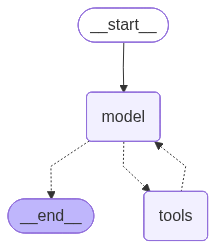

In [22]:
# Visualize the agent's decision-making flow
try:
    graph_image = graph.get_graph().draw_mermaid_png()
    display(Image(graph_image))
except Exception as e:
    print(f"Visualization error: {e}")

## 4. Agent Execution and Examples

---

### 4.1 Execution Utilities and Helper Functions

Implement utilities for clean agent interaction and response handling.

**Design Principles**:
- **Streaming support**: Real-time response visibility
- **Markdown rendering**: Enhanced output formatting
- **Message inspection**: Debug and analysis capabilities
- **Error handling**: Graceful failure management

In [23]:
def render_markdown(content: str) -> None:
    """Render markdown content in Jupyter Notebook for enhanced readability.

    Args:
        content: Markdown-formatted string to display
    """
    display(Markdown(content))

def process_stream(stream) -> object:
    """
    Process streaming agent responses with real-time output display.

    Args:
        stream: LangGraph streaming response iterator

    Returns:
        object: Final message object from the stream

    Features:
        - Real-time message display
        - Pretty printing with formatting
        - Handles multiple message types
    """
    final_message = None

    for chunk in stream:
        # Extract the latest message from the chunk
        if 'messages' in chunk and chunk['messages']:
            message = chunk['messages'][-1]

            # Handle different message types
            if isinstance(message, tuple):
                print(message)
            else:
                # Use pretty_print if available, otherwise print content
                if hasattr(message, 'pretty_print'):
                    message.pretty_print()
                else:
                    print(f"Message: {getattr(message, 'content', str(message))}")

            final_message = message

    return final_message

def process_query(query: str) -> None:
    """
    Complete query processing with streaming and formatted output.

    Args:
        query: User query string

    Features:
        - Streaming execution with real-time feedback
        - Formatted markdown output
        - Error handling and recovery
    """
    try:
        # Prepare input in LangGraph format
        inputs = {"messages": [("user", query)]}

        # Stream the response with values mode
        stream = graph.stream(inputs, stream_mode='values')
        message = process_stream(stream)

        # Render final answer in markdown format
        if message and hasattr(message, 'content'):
            render_markdown(f"## Answer:\n{message.content}")
        else:
            print("Query completed but no final message content available")

    except Exception as e:
        print(f"Query processing error: {e}")
        print("Please check your API keys and network connection")

### 4.2 Practical Examples and Use Cases

Demonstrate agent capabilities through real-world scenarios.

---

#### 4.2.1 Real-Time Sports Information Retrieval

Query current sports results demonstrating web search integration and date awareness.

In [24]:
# Example 1: Real-time sports information
process_query("Who won the latest Real Madrid vs Barcelona match? Provide the date of the match as well.")

================================ Human Message =================================

Who won the latest Real Madrid vs Barcelona match? Provide the date of the match as well.
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_ciqMFcGWodlbNgcwRtFZ9D3b)
 Call ID: call_ciqMFcGWodlbNgcwRtFZ9D3b
  Args:
    query: latest Real Madrid vs Barcelona match winner
    topic: news
    time_range: month
================================= Tool Message =================================
Name: tavily_search

{"query": "latest Real Madrid vs Barcelona match winner", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.skysports.com/football/news/11827/13458119/real-madrid-2-1-barcelona-jude-bellingham-scores-winner-in-ferocious-el-clasico-as-real-madrid-go-five-clear-at-top-of-laliga", "title": "Real Madrid 2-1 Barcelona: Jude Bellingham scores winner in ferocious El Clasico as Real Madrid go five clear at

## Answer:
The latest Real Madrid vs Barcelona match was won by Real Madrid with a score of 2-1. The match took place on October 26, 2025. The goals for Real Madrid were scored by Kylian Mbappé and Jude Bellingham. [^source^](https://www.skysports.com/football/news/11827/13458119/real-madrid-2-1-barcelona-jude-bellingham-scores-winner-in-ferocious-el-clasico-as-real-madrid-go-five-clear-at-top-of-laliga)

#### 4.2.2 Temporal Queries with Date Context

Demonstrate agent's ability to use temporal context for accurate information retrieval.

In [25]:
# Example 2: Temporal context with current date
process_query("What are the latest developments in AI research this week?")

================================ Human Message =================================

What are the latest developments in AI research this week?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_X8h0p4mL3ErXoxqdhkSZl5Qp)
 Call ID: call_X8h0p4mL3ErXoxqdhkSZl5Qp
  Args:
================================= Tool Message =================================
Name: get_current_date

The current date is: 2025-10-28
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_9UJ0me2R0IkvmfoM0EniRZHW)
 Call ID: call_9UJ0me2R0IkvmfoM0EniRZHW
  Args:
    query: latest developments in AI research
    search_depth: advanced
    time_range: week
    topic: general
================================= Tool Message =================================
Name: tavily_search

{"query": "latest developments in AI research", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url":

## Answer:
Here are some of the latest developments in AI research this week:

1. Purdue University researchers introduced RAPTOR, an AI-powered defect-detection system combining high-resolution X-ray imaging and machine learning. [Read more](https://www.crescendo.ai/news/latest-ai-news-and-updates)

2. Major AI labs have invested heavily in alignment research. OpenAI, for instance, has continually refined its training techniques to curb unwanted behavior: GPT-5 was explicitly designed to reduce hallucinations and sycophantic answers, and to follow user instructions more faithfully than prior models. [Read more](https://ttms.com/my/an-update-to-supremacy-ai-chatgpt-and-the-race-that-will-change-the-world/)

3. NVIDIA-powered agentic AI is set to accelerate every step of the pharmaceutical life cycle in collaboration with IQVIA, the world’s leading provider of clinical research services. IQVIA’s orchestrator agents accelerate workflows and allow researchers to focus on decision-making instead of administrative work. [Read more](https://www.technet.org/media/ai-in-action-october-2025/)

4. At MIT, Assistant Professor Priya Donti’s research applies machine learning to optimize renewable energy. Also, the MIT-IBM Watson AI Lab is shaping AI-sociotechnical systems for the future. [Read more](https://news.mit.edu/topic/artificial-intelligence2)

Please visit the provided links for more detailed information.

## 5. Advanced Features

Explore LangGraph's advanced capabilities for enhanced agent functionality using the implemented agent architecture.

---

### 5.1 Streaming Architecture and Real-Time Processing
LangGraph provides native streaming support for real-time response generation, enabling immediate user feedback during tool execution and reasoning phases.

**Streaming Modes Available:**
- **Values Mode**: Stream complete state updates after each node execution
- **Updates Mode**: Stream incremental state changes within nodes
- **Debug Mode**: Stream with full execution context and metadata

**Benefits**:
- Immediate user feedback during tool calls
- Reduced perceived latency for complex queries
- Progressive content loading for multi-step reasoning
- Enhanced user experience with real-time visibility

#### 5.1.1 Updates Mode Streaming
Stream incremental state changes rather than complete state snapshots.

In [ ]:
def updates_streaming_demo():
    """
    Demonstrate updates mode streaming for granular state monitoring.
    Shows only the changes between states, useful for debugging and monitoring.
    """
    query = "What's today's date and latest AI research developments?"
    inputs = {"messages": [("user", query)]}

    print("=== UPDATES MODE STREAMING ===")
    print("Shows only state changes between execution steps:\n")

    # Stream with updates mode - shows only what changed
    updates_stream = graph.stream(inputs, stream_mode="updates")

    for i, update in enumerate(updates_stream):
        print(f"Update {i+1}:")
        for node_name, node_update in update.items():
            print(f"  Node '{node_name}' updated:")
            if "messages" in node_update:
                new_messages = node_update["messages"]
                for msg in new_messages:
                    print(f"    + {type(msg).__name__}: {str(msg)[:80]}...")
            print()

        if i >= 4:  # Limit for demonstration
            break


# Execute updates streaming demo
demonstrate_updates_streaming()

{'messages': [HumanMessage(content="What's the weather like today?", additional_kwargs={}, response_metadata={}, id='e8bd28b9-fb86-450b-b413-d99dc2635b20')]}
{'messages': [HumanMessage(content="What's the weather like today?", additional_kwargs={}, response_metadata={}, id='e8bd28b9-fb86-450b-b413-d99dc2635b20'), AIMessage(content="I'm sorry, but as an AI text-based model, I don't have real-time capabilities to provide current weather updates. I recommend checking a reliable weather forecasting website or app for the most accurate information.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 1361, 'total_tokens': 1403, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'id': 'chatcmpl-

## 6. References

**Official Documentation**:
- [LangGraph Documentation](https://python.langchain.com/docs/langgraph)
- [LangGraph GitHub Repository](https://github.com/langchain-ai/langgraph)
- [LangChain Documentation](https://python.langchain.com/docs/get_started/introduction)
- [OpenAI Function Calling](https://platform.openai.com/docs/guides/function-calling)

**ReAct Pattern and Agent Architectures**:
- [ReAct: Synergizing Reasoning and Acting](https://arxiv.org/abs/2210.03629)
- [Toolformer: Language Models Can Teach Themselves to Use Tools](https://arxiv.org/abs/2302.04761)
- [WebGPT: Browser-assisted question-answering](https://arxiv.org/abs/2112.09332)
- [Language Models as Tool Users](https://arxiv.org/abs/2302.04761)

**LangGraph Specific Resources**:
- [LangGraph Tutorials](https://python.langchain.com/docs/langgraph/tutorials)
- [Prebuilt Agents](https://python.langchain.com/docs/langgraph/reference/prebuilt)
- [State Management](https://python.langchain.com/docs/langgraph/concepts/state)
- [Streaming in LangGraph](https://python.langchain.com/docs/langgraph/concepts/streaming)

**Tool Integration and APIs**:
- [Tavily Search API](https://tavily.com/)
- [LangChain Tools](https://python.langchain.com/docs/concepts/tools)
- [Tool Calling Best Practices](https://python.langchain.com/docs/concepts/tool_calling)

**Production and Deployment**:
- [LangServe](https://python.langchain.com/docs/langserve) - REST API deployment
- [LangSmith](https://smith.langchain.com/) - Monitoring and evaluation
- [OpenAI Production Best Practices](https://platform.openai.com/docs/guides/production-best-practices)
- [LangGraph Production Guide](https://python.langchain.com/docs/langgraph/how-tos/deploy)

**Related Papers and Research**:
- [Chain-of-Thought Prompting](https://arxiv.org/abs/2201.11903)
- [Constitutional AI](https://arxiv.org/abs/2212.08073)
- [Tool Learning with Foundation Models](https://arxiv.org/abs/2304.08354)

**Community Resources**:
- [LangChain Community](https://github.com/langchain-ai/langchain-community)
- [LangGraph Examples](https://github.com/langchain-ai/langgraph/tree/main/examples)
- [LangChain Blog](https://blog.langchain.dev/)

---

*Last updated: October 2025*

*This notebook demonstrates professional-grade LangGraph ReAct agent implementation with comprehensive documentation, practical examples, and production-ready patterns.*